In [8]:
# 1️⃣ Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
# 2️⃣ Load Inventory Data from Excel
file_path = r"D:\personal\bdas.spyberpolymath.com\project\data\Inventory_Analysis.xlsx"
df = pd.read_excel(file_path)

In [10]:
# 3️⃣ Display Data
print("Inventory Data:")
df.head()

Inventory Data:


,ProductID,StockLevel,ReorderLevel,SalesLastMonth
0,1,112,127,45
1,2,445,74,33
2,3,358,83,19
3,4,280,150,49
4,5,116,70,69


In [11]:
# 4️⃣ Basic Inventory Analysis
df['Stock_vs_Reorder'] = df['StockLevel'] - df['ReorderLevel']
df['Needs_Reorder'] = df['StockLevel'] < df['ReorderLevel']

In [12]:
# Summary Stats
print("Inventory Summary:")
print(df.describe())
print("\nProducts needing reorder:")
print(df[df['Needs_Reorder']])

Inventory Summary:
       ProductID  StockLevel  ReorderLevel  SalesLastMonth  Stock_vs_Reorder
count   50.00000   50.000000     50.000000         50.0000          50.00000
mean    25.50000  264.360000    100.480000         47.1400         163.88000
std     14.57738  142.791665     51.266507         30.3342         142.14862
min      1.00000   30.000000     21.000000          5.0000         -94.00000
25%     13.25000  144.750000     64.000000         18.2500          59.75000
50%     25.50000  264.500000    100.500000         40.0000         158.50000
75%     37.75000  378.750000    147.500000         75.7500         270.00000
max     50.00000  485.000000    194.000000         95.0000         435.00000

Products needing reorder:
    ProductID  StockLevel  ReorderLevel  SalesLastMonth  Stock_vs_Reorder  \
0           1         112           127              45               -15   
5           6          81           154              93               -73   
7           8          30     

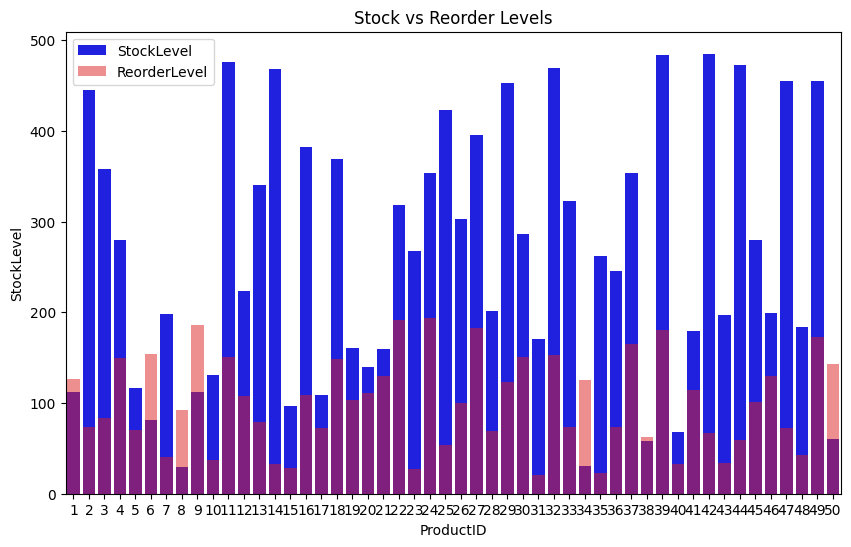

In [13]:
# 5️⃣ Visualization
plt.figure(figsize=(10,6))
sns.barplot(x='ProductID', y='StockLevel', data=df, color='blue', label='StockLevel')
sns.barplot(x='ProductID', y='ReorderLevel', data=df, color='red', alpha=0.5, label='ReorderLevel')
plt.title('Stock vs Reorder Levels')
plt.legend()
plt.show()

In [14]:
# 6️⃣ Sales Forecasting (Simple forecast using last month sales)
# Since we only have one month, forecast = last month sales
df['ForecastNextMonth'] = df['SalesLastMonth']  # Next month same as last month
df['RecommendedReorder'] = df['ForecastNextMonth'] > df['StockLevel']

In [15]:
# 7️⃣ Final Forecast Table
print("\nForecast and Reorder Recommendations:")
print(df[['ProductID', 'StockLevel', 'ForecastNextMonth', 'RecommendedReorder']])


Forecast and Reorder Recommendations:
    ProductID  StockLevel  ForecastNextMonth  RecommendedReorder
0           1         112                 45               False
1           2         445                 33               False
2           3         358                 19               False
3           4         280                 49               False
4           5         116                 69               False
5           6          81                 93                True
6           7         198                 75               False
7           8          30                 13               False
8           9         112                 92               False
9          10         131                  5               False
10         11         476                 12               False
11         12         224                 92               False
12         13         340                 67               False
13         14         468                 15       

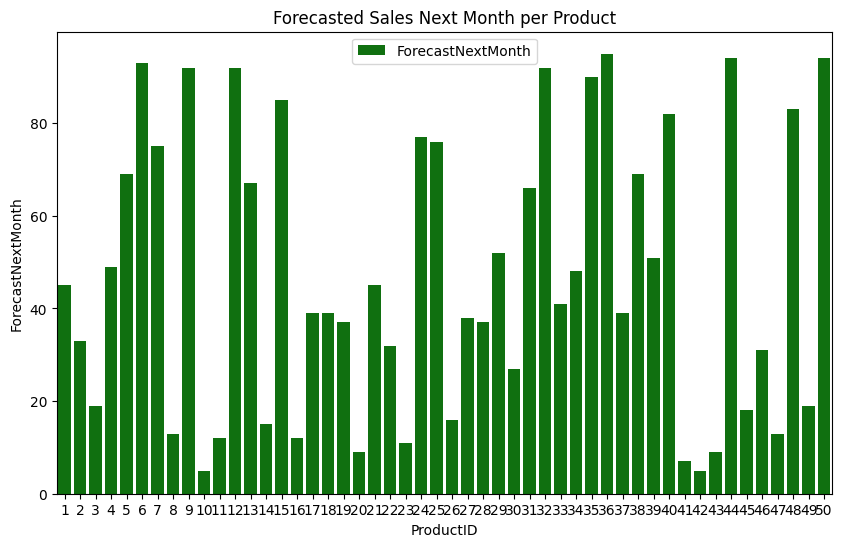

In [16]:
# 8️⃣ Visualize Forecast
plt.figure(figsize=(10,6))
sns.barplot(x='ProductID', y='ForecastNextMonth', data=df, color='green', label='ForecastNextMonth')
plt.title('Forecasted Sales Next Month per Product')
plt.show()